In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# preprocessing

ابتدا با حدآستانه 15 ویژگی هر داده‌ای که کمتر از 15 عدد ویژگی آن غیر NAN است، حذف می‌کنیم.

بعد از بررسی تجمعی داده‌های NAN برای هر ویژگی و 
همچنین داده‌های شامل NAN یک کار انجام می‌دهیم.
برای هر داده NAN مینگین ویژگی مربوطه را قرار می‌دهیم.
همچنین در ادامه پروژه دریافتیم که یک داده مربوط به ویژگی درامد مقدار آن ناشناخته است که برای این داده مقدار با بیشترین تعداد را جایگذاری می‌کنیم.


In [50]:
dataFrame = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv")
print(dataFrame.isna().sum())
dataFrame = dataFrame.dropna(thresh=15)
print(dataFrame.isna().sum())
print("isna rows")
print(dataFrame[dataFrame['BMI'].isna()]['Unnamed: 0'])
print(dataFrame[dataFrame['Difficulty Walking'].isna()]['Unnamed: 0'])
print(dataFrame[dataFrame['Any Health Care'].isna()]['Unnamed: 0'])
print(dataFrame[dataFrame['Fruits'].isna()]['Unnamed: 0'])
print(dataFrame[dataFrame['No Doctor because of Cost'].isna()]['Unnamed: 0'])
print(dataFrame["BMI"].mean())
print("filling data with mean")
dataFrame['BMI'].fillna(value=dataFrame['BMI'].mean(), inplace=True)
dataFrame['Difficulty Walking'].fillna(value=1 if dataFrame['Difficulty Walking'].mean() > 0.5 else 0, inplace=True)
dataFrame['Any Health Care'].fillna(value=1 if dataFrame['Any Health Care'].mean() > 0.5 else 0, inplace=True)
dataFrame['Fruits'].fillna(value=1 if dataFrame['Fruits'].mean() > 0.5 else 0, inplace=True)
dataFrame['No Doctor because of Cost'].fillna(value=1 if dataFrame['No Doctor because of Cost'].mean() > 0.5 else 0, inplace=True)
## Unknown income
dataFrame['Income'] = dataFrame['Income'].replace(['Unknown'],dataFrame['Income'].mode())

print(dataFrame.isna().sum())

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64
Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack      

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
dataFrame.columns = dataFrame.columns.str.replace(' ', '_')

In [52]:
dataFrame

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


In [53]:
print(dataFrame.dtypes)
## categorical: General_Health - Sex - Education - Income
dataFrame_num = dataFrame.select_dtypes(include=['float64'])
trans = preprocessing.StandardScaler()
dataFrame_num_normalized = trans.fit_transform(dataFrame_num)
final_dataFrame = pd.DataFrame(dataFrame_num_normalized, columns = ["Diabetes_binary","HighBP","High_Cholesterol","Cholesterol_Check","BMI","Smoker","Stroke","HeartDiseaseorAttack","Physical_Activity","Fruits","Veggies","Heavy_Alcohol_Consumption","Any_Health_Care","No_Doctor_because_of_Cost","Mental_Health","Physical_Health","Difficulty_Walking","Age"])
final_dataFrame


Unnamed:_0                     int64
Diabetes_binary              float64
HighBP                       float64
High_Cholesterol             float64
Cholesterol_Check            float64
BMI                          float64
Smoker                       float64
Stroke                       float64
HeartDiseaseorAttack         float64
Physical_Activity            float64
Fruits                       float64
Veggies                      float64
Heavy_Alcohol_Consumption    float64
Any_Health_Care              float64
No_Doctor_because_of_Cost    float64
General_Health                object
Mental_Health                float64
Physical_Health              float64
Difficulty_Walking           float64
Sex                           object
Age                          float64
Education                     object
Income                        object
dtype: object


,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age
0,-1.000014,0.880187,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,-1.255357,0.517489,-0.211253,0.217176,-0.321947,0.153016,2.403988,-0.581559,-1.607262
1,-1.000014,0.880187,0.949836,0.159277,-0.542174,1.050725,3.883866,-0.416474,-1.538623,0.796586,-1.932407,-0.211253,0.217176,-0.321947,-0.460058,-0.577456,-0.581559,1.197668
2,-1.000014,-1.136122,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,0.796586,0.517489,-0.211253,0.217176,-0.321947,-0.460058,0.416359,-0.581559,1.548284
3,-1.000014,0.880187,0.949836,0.159277,-0.261036,1.050725,-0.257475,-0.416474,0.649932,0.796586,0.517489,-0.211253,0.217176,-0.321947,-0.460058,-0.279312,-0.581559,0.847052
4,-1.000014,-1.136122,-1.052814,0.159277,-0.120467,1.050725,-0.257475,-0.416474,0.649932,0.796586,0.517489,-0.211253,0.217176,-0.321947,-0.460058,-0.577456,-0.581559,-0.204797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,0.999986,-1.136122,0.949836,0.159277,1.004085,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,0.517489,-0.211253,0.217176,-0.321947,-0.460058,-0.577456,-0.581559,-0.906029
70687,0.999986,-1.136122,0.949836,0.159277,-0.120467,1.050725,-0.257475,2.401111,-1.538623,0.796586,0.517489,-0.211253,0.217176,-0.321947,-0.460058,-0.577456,1.719515,0.496436
70688,0.999986,0.880187,0.949836,0.159277,-0.682743,-0.951723,-0.257475,2.401111,-1.538623,0.796586,-1.932407,-0.211253,0.217176,-0.321947,1.379163,-0.577456,1.719515,1.548284
70689,0.999986,0.880187,0.949836,0.159277,-1.666727,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,-1.932407,-0.211253,0.217176,-0.321947,-0.460058,-0.577456,1.719515,0.847052


برای یافتن ویژگی‌های دسته بندی و کد گذاری آن از onehot مشابه تمرین اول استفاده می‌کنیم.

همچنین ویژگی‌های زیر باید کدگذاری شوند.

General_Health - Sex - Education - Income

In [54]:
## categorical: General_Health - Sex - Education - Income
lst = ["General_Health", "Sex", "Education", "Income"]
gh_types = ('GH_medium' ,'GH_high', 'GH_good','GH_low','GH_veryLow')
sex_types = ('male' ,'female')
ed_types = ('E1','E2','E3','E4','E5','E6')
income_types = ('I1','I2','I3','I4','I5','I6','I7','I8')
print(set(dataFrame["Income"]))
for col in lst:
  enc = preprocessing.OneHotEncoder()
  df_enc = enc.fit_transform(dataFrame[[col]].values.reshape(-1,1)).toarray()
  tp = ()
  if col == "General_Health":
    tp = gh_types
  elif col == "Sex":
    tp = sex_types
  elif col == "Education":
    tp = ed_types
  else:
    tp = income_types
  final_dataFrame = final_dataFrame.join(pd.DataFrame(df_enc ,columns=tp))
final_dataFrame   

{'Cat2', 'Cat8', 'Cat1', 'Cat6', 'Cat5', 'Cat3', 'Cat4', 'Cat7'}


,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,E5,E6,I1,I2,I3,I4,I5,I6,I7,I8
0,-1.000014,0.880187,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,-1.255357,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.000014,0.880187,0.949836,0.159277,-0.542174,1.050725,3.883866,-0.416474,-1.538623,0.796586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.000014,-1.136122,-1.052814,0.159277,-0.542174,-0.951723,-0.257475,-0.416474,0.649932,0.796586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.000014,0.880187,0.949836,0.159277,-0.261036,1.050725,-0.257475,-0.416474,0.649932,0.796586,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.000014,-1.136122,-1.052814,0.159277,-0.120467,1.050725,-0.257475,-0.416474,0.649932,0.796586,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,0.999986,-1.136122,0.949836,0.159277,1.004085,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70687,0.999986,-1.136122,0.949836,0.159277,-0.120467,1.050725,-0.257475,2.401111,-1.538623,0.796586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,0.999986,0.880187,0.949836,0.159277,-0.682743,-0.951723,-0.257475,2.401111,-1.538623,0.796586,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70689,0.999986,0.880187,0.949836,0.159277,-1.666727,-0.951723,-0.257475,-0.416474,-1.538623,-1.255357,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


داده‌ها را شفل کرده و لیبل را از جدا می‌کنیم.

In [55]:
shuffled = final_dataFrame.sample(frac=1,random_state=1)
features = shuffled.loc[ : , shuffled.columns != 'Diabetes_binary']
labels = shuffled.loc[ : , shuffled.columns == 'Diabetes_binary']
features
labels

,Diabetes_binary
25002,-1.000014
60234,0.999986
23894,-1.000014
6931,-1.000014
44360,0.999986
...,...
49100,0.999986
20609,-1.000014
21440,-1.000014
50057,0.999986


# Classifier

ساخت مدل طبق دستور گفته شده انجام می‌شود.

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1)

model = XGBClassifier(learning_rate=0.1,
                      max_depth=4,
                      N_estimator=200,
                      subsample=0.5,
                      colsample_bytree=1,
                      Random_seed=123,
                      eval_metric='auc',
                      verbosity=1)
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10) 
y_train_label = [round(value) for value in y_train.copy()['Diabetes_binary']]
y_test_label = [round(value) for value in y_test.copy()['Diabetes_binary']]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.785961	validation_1-auc:0.781026
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.801519	validation_1-auc:0.798
[2]	validation_0-auc:0.804268	validation_1-auc:0.800394
[3]	validation_0-auc:0.809456	validation_1-auc:0.806016
[4]	validation_0-auc:0.811705	validation_1-auc:0.808195
[5]	validation_0-auc:0.812587	validation_1-auc:0.809313
[6]	validation_0-auc:0.8136	validation_1-auc:0.810515
[7]	validation_0-auc:0.813908	validation_1-auc:0.810391
[8]	validation_0-auc:0.814718	validation_1-auc:0.810954
[9]	validation_0-auc:0.815696	validation_1-auc:0.812472
[10]	validation_0-auc:0.817465	validation_1-auc:0.814233
[11]	validation_0-auc:0.817916	validation_1-auc:0.81477
[12]	validation_0-auc:0.819344	validation_1-auc:0.816445
[13]	validation_0-auc:0.820478	validation_1-auc:0.817666
[14]	validation_0-auc:0.821764	validation_1-auc:0.819193
[15]

In [57]:
results = model.evals_result()
results

{'validation_0': {'auc': [0.785961,
   0.801519,
   0.804268,
   0.809456,
   0.811705,
   0.812587,
   0.8136,
   0.813908,
   0.814718,
   0.815696,
   0.817465,
   0.817916,
   0.819344,
   0.820478,
   0.821764,
   0.822647,
   0.823206,
   0.823685,
   0.824167,
   0.825022,
   0.825442,
   0.826044,
   0.826516,
   0.827162,
   0.827603,
   0.828146,
   0.828626,
   0.828986,
   0.829255,
   0.829538,
   0.829799,
   0.830103,
   0.830415,
   0.830686,
   0.830931,
   0.831117,
   0.83138,
   0.83153,
   0.831686,
   0.831857,
   0.832004,
   0.83214,
   0.832277,
   0.832463,
   0.83268,
   0.832842,
   0.832936,
   0.83311,
   0.833255,
   0.833418,
   0.833573,
   0.833652,
   0.833753,
   0.833857,
   0.833963,
   0.834044,
   0.834141,
   0.83427,
   0.834394,
   0.834527,
   0.834612,
   0.834721,
   0.83489,
   0.834951,
   0.83502,
   0.835127,
   0.835218,
   0.83528,
   0.835413,
   0.835457,
   0.835529,
   0.835624,
   0.835768,
   0.835828,
   0.835939,
   0.836062,


In [ ]:
ماتریس درهم ریختگی مشابه تمرین دوم و همچنین معیار ها با توابع importشده محاسبه می‌شود.

XGBClassifier(N_estimator=200, Random_seed=123, eval_metric='auc', max_depth=4,
              subsample=0.5)
accuracy_score(train data): 0.7594325323848594
accuracy_score(test data): 0.7560826103357223
********************************************
recall_score(train data): 0.8017737102130073
recall_score(test data): 0.7993803980473151
********************************************
precision_score(train data): 0.7385481945687854
precision_score(test data): 0.7371656133668081


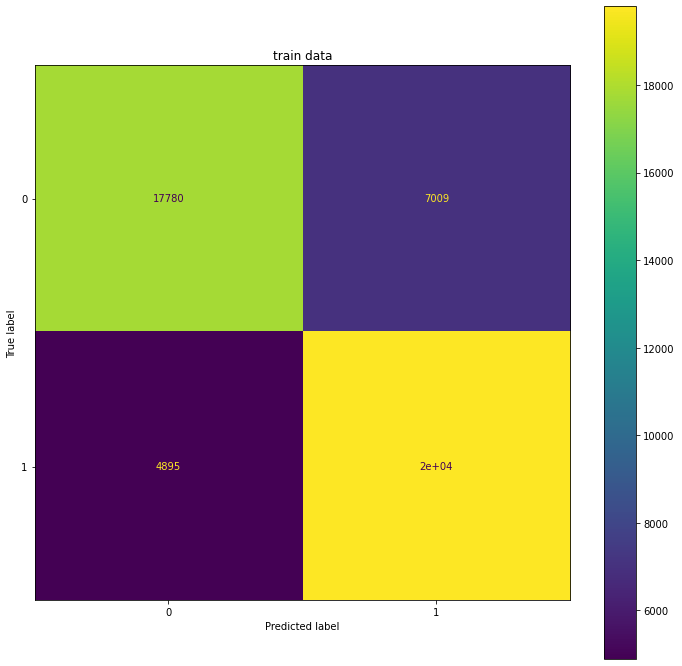

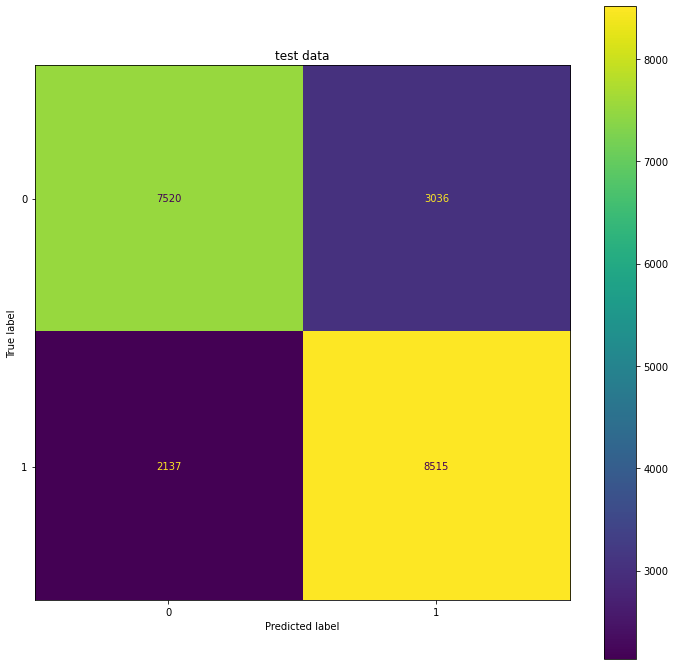

In [58]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay

print(model)
#y_train, y_test 
train_data_res = [round(value) for value in model.predict(X_train)]
test_data_res = [round(value) for value in model.predict(X_test)]

print(f'accuracy_score(train data): {accuracy_score(y_train_label,train_data_res)}')
print(f'accuracy_score(test data): {accuracy_score(y_test_label,test_data_res)}')
print("********************************************")
print(f'recall_score(train data): {recall_score(y_train_label,train_data_res)}')
print(f'recall_score(test data): {recall_score(y_test_label,test_data_res)}')
print("********************************************")
print(f'precision_score(train data): {precision_score(y_train_label,train_data_res)}')
print(f'precision_score(test data): {precision_score(y_test_label,test_data_res)}')

cm = confusion_matrix(y_train_label,train_data_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12,12))
plt.title("train data")
disp.plot(ax=ax);


cm = confusion_matrix(y_test_label,test_data_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12,12))
plt.title("test data")
disp.plot(ax=ax);



# Hyperparameter Tuning

با تعریف parameters و طبق دستور کار gridsearch آموزش داده شده و بهترین آن اعلام می‌شود.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

XGBClassifier().get_params()

def my_roc_auc_score(model, X, y):
   return roc_auc_score(y, model.predict_proba(X)[:,1])

parameters = [{'learning_rate': [0.02, 0.05, 0.1, 0.3],
         'Max_depth': [2, 3, 4],
         'N_estimator': [100, 200, 300],
         'Colsample_bytree' : [0.8, 1]
         }]
kfold = StratifiedKFold(n_splits=3,shuffle=True, random_state=20)
model_ = XGBClassifier(Eval_metric="auc" ,Subsample=0.5)
grid_search = GridSearchCV(
    estimator=model_,
    param_grid=parameters,
    scoring = my_roc_auc_score,
    cv = kfold,
    verbose=10
)
grid_search.fit(X_train, y_train_label)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3; 1/72] START Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02
[CV 1/3; 1/72] END Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02;, score=0.818 total time=   2.8s
[CV 2/3; 1/72] START Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02
[CV 2/3; 1/72] END Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02;, score=0.816 total time=   2.8s
[CV 3/3; 1/72] START Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02
[CV 3/3; 1/72] END Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.02;, score=0.821 total time=   2.8s
[CV 1/3; 2/72] START Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.05
[CV 1/3; 2/72] END Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learning_rate=0.05;, score=0.827 total time=   2.8s
[CV 2/3; 2/72] START Colsample_bytree=0.8, Max_depth=2, N_estimator=100, learn

{'Colsample_bytree': 0.8,
 'Max_depth': 2,
 'N_estimator': 100,
 'learning_rate': 0.1}

In [60]:
final_model = XGBClassifier(Max_depth=2,Colsample_bytree=0.8,learning_rate=0.1,N_estimator=100 ,Eval_metric="auc" ,Subsample=0.5)
final_model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=10) 
final_model.get_params()


[0]	validation_0-error:0.288645	validation_1-error:0.291588
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.28915	validation_1-error:0.294323
[2]	validation_0-error:0.292565	validation_1-error:0.296256
[3]	validation_0-error:0.286321	validation_1-error:0.289089
[4]	validation_0-error:0.284421	validation_1-error:0.288335
[5]	validation_0-error:0.281086	validation_1-error:0.284468
[6]	validation_0-error:0.280723	validation_1-error:0.283761
[7]	validation_0-error:0.277469	validation_1-error:0.281026
[8]	validation_0-error:0.273912	validation_1-error:0.276688
[9]	validation_0-error:0.271063	validation_1-error:0.273765
[10]	validation_0-error:0.271144	validation_1-error:0.273859
[11]	validation_0-error:0.265909	validation_1-error:0.267776
[12]	validation_0-error:0.264758	validation_1-error:0.265042
[13]	validation_0-error:0.261827	validation_1-error:0.262495
[14]	validation_0-error:0.262151	validation_1-error:0.26259
[15]	validation_0-error:0.259463	validation_1-error:0.260326
[16]	validation_0-error:0.257785	validation_1-error:0.258487
[17]	validation_0-error:0.256735	va

{'Colsample_bytree': 0.8,
 'Eval_metric': 'auc',
 'Max_depth': 2,
 'N_estimator': 100,
 'Subsample': 0.5,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

XGBClassifier(Colsample_bytree=0.8, Eval_metric='auc', Max_depth=2,
              N_estimator=100, Subsample=0.5)
accuracy_score(train data): 0.7594325323848594
accuracy_score(test data): 0.7560826103357223
********************************************
recall_score(train data): 0.8017737102130073
recall_score(test data): 0.7993803980473151
********************************************
precision_score(train data): 0.7385481945687854
precision_score(test data): 0.7371656133668081


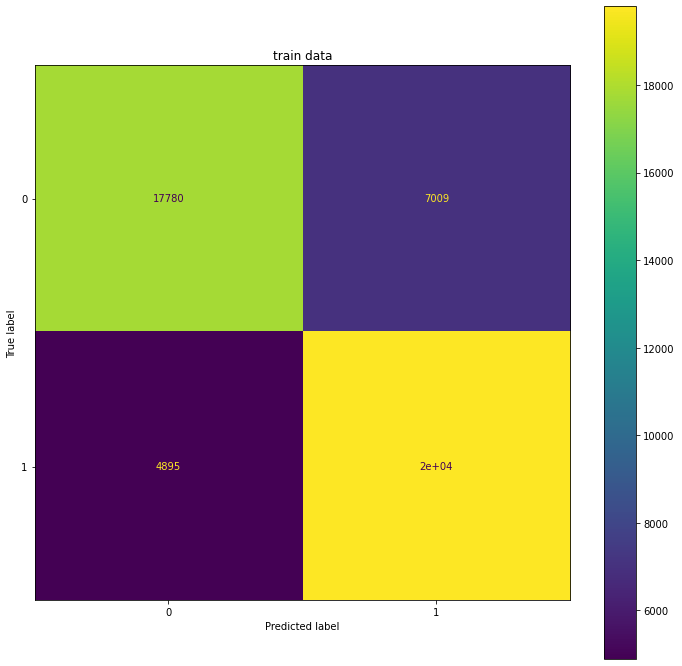

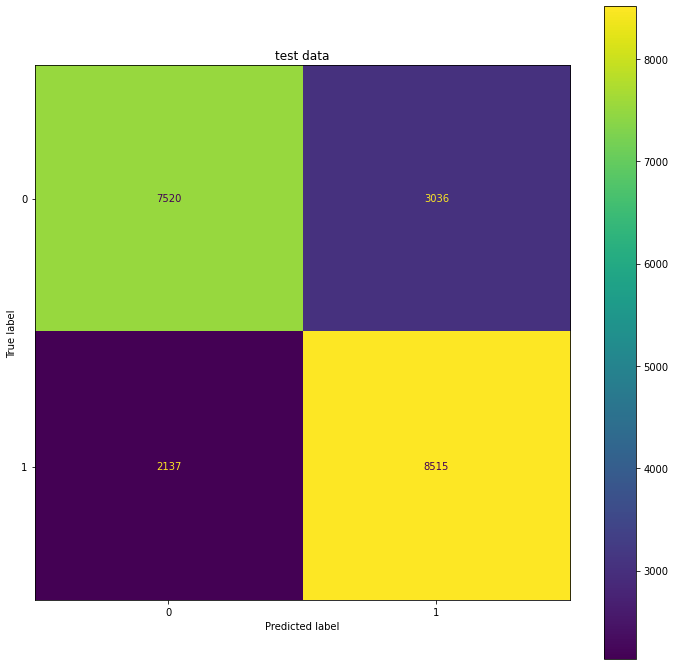

In [61]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay

print(final_model)
#y_train, y_test 
train_data_res = [round(value) for value in model.predict(X_train)]
test_data_res = [round(value) for value in model.predict(X_test)]

print(f'accuracy_score(train data): {accuracy_score(y_train_label,train_data_res)}')
print(f'accuracy_score(test data): {accuracy_score(y_test_label,test_data_res)}')
print("********************************************")
print(f'recall_score(train data): {recall_score(y_train_label,train_data_res)}')
print(f'recall_score(test data): {recall_score(y_test_label,test_data_res)}')
print("********************************************")
print(f'precision_score(train data): {precision_score(y_train_label,train_data_res)}')
print(f'precision_score(test data): {precision_score(y_test_label,test_data_res)}')

cm = confusion_matrix(y_train_label,train_data_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12,12))
plt.title("train data")
disp.plot(ax=ax);


cm = confusion_matrix(y_test_label,test_data_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12,12))
plt.title("test data")
disp.plot(ax=ax);


# Visualization

برای این قسمت ابتدا تمام امتیازها و پارامترهارا داخل دولیست ذخیره کرده و بعد از آن به ازای هر پارامتر متغیر و درنظر گرفته سه پارامتر دیگر ثابت با بهترین مقادیر خود نمودارها را رسم می‌کنیم.

که همانطور که مشاهده می‌شود تنها به learning rate بستگی داسته و مقدار آن0.1 خواهد بود.

توجه: البته توجه داشته باشید که این نمودارها به معنی بی اثری مطلق پارامترهای دیگر نیست چون بر اساس یک سری پارامتر دیگر رسم شده است.

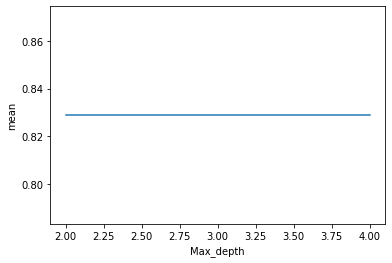

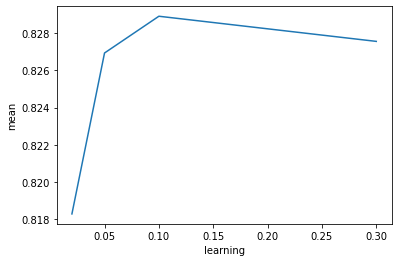

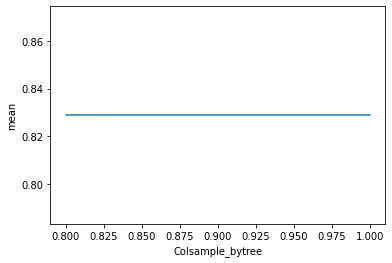

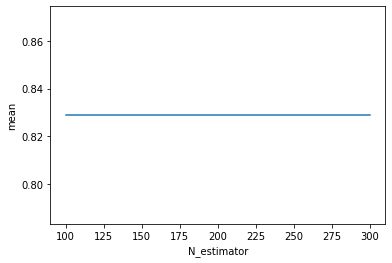

In [62]:
import matplotlib
import matplotlib.pyplot as plt

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

######### Max_depth is variable. #########
y_mean = []
for i in range(len(means)):
  if params[i]["learning_rate"]==grid_search.best_params_['learning_rate'] and params[i]["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] and params[i]["N_estimator"]==grid_search.best_params_['N_estimator'] :    
    y_mean.append(means[i])

plt.plot(parameters[0]['Max_depth'], y_mean)
plt.xlabel('Max_depth')
plt.ylabel('mean')
plt.show()

######### learning rate is variable. #########
y_mean = []
for i in range(len(means)):
  if params[i]["Max_depth"]==grid_search.best_params_['Max_depth'] and params[i]["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] and params[i]["N_estimator"]==grid_search.best_params_['N_estimator'] :    
    y_mean.append(means[i])

plt.plot(parameters[0]['learning_rate'], y_mean)
plt.xlabel('learning')
plt.ylabel('mean')
plt.show()



######### Colsample_bytree is variable. #########
y_mean = []
for i in range(len(means)):
  if params[i]["Max_depth"]==grid_search.best_params_['Max_depth'] and params[i]["learning_rate"]==grid_search.best_params_['learning_rate'] and params[i]["N_estimator"]==grid_search.best_params_['N_estimator'] :    
    y_mean.append(means[i])

plt.plot(parameters[0]['Colsample_bytree'], y_mean)
plt.xlabel('Colsample_bytree')
plt.ylabel('mean')
plt.show()

######### N_estimator is variable. #########
y_mean = []
for i in range(len(means)):
  if params[i]["Max_depth"]==grid_search.best_params_['Max_depth'] and params[i]["learning_rate"]==grid_search.best_params_['learning_rate'] and params[i]["Colsample_bytree"]==grid_search.best_params_['Colsample_bytree'] :    
    y_mean.append(means[i])

plt.plot(parameters[0]['N_estimator'], y_mean)
plt.xlabel('N_estimator')
plt.ylabel('mean')
plt.show()





